# Исследование объявлений о продаже квартир

В рамках данного проекта мы имеем доступ к данным сервиса Яндекс.Недвижимость, которые включают в себя архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Наша цель заключается в том, чтобы разработать модель, способную определять рыночную стоимость недвижимости. Для достижения этой цели необходимо установить оптимальные параметры, которые в будущем помогут построить автоматизированную систему, способную выявлять аномалии и мошенническую деятельность.

У нас есть два вида данных по каждой квартире на продажу. Первый вид данных предоставлен пользователями, а второй вид — получен автоматически на основе картографических данных. Например, мы имеем информацию о расстоянии до центра города, аэропорта, ближайшего парка и водоёма. Важно учесть оба вида данных при построении модели для достижения наиболее точного прогнозирования рыночной стоимости недвижимости.

### Откроем файл с данными и изучим общую информацию. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
data = pd.read_csv()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Таблица состоит из 22 столбцов:

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах (м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — общая площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении

In [4]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

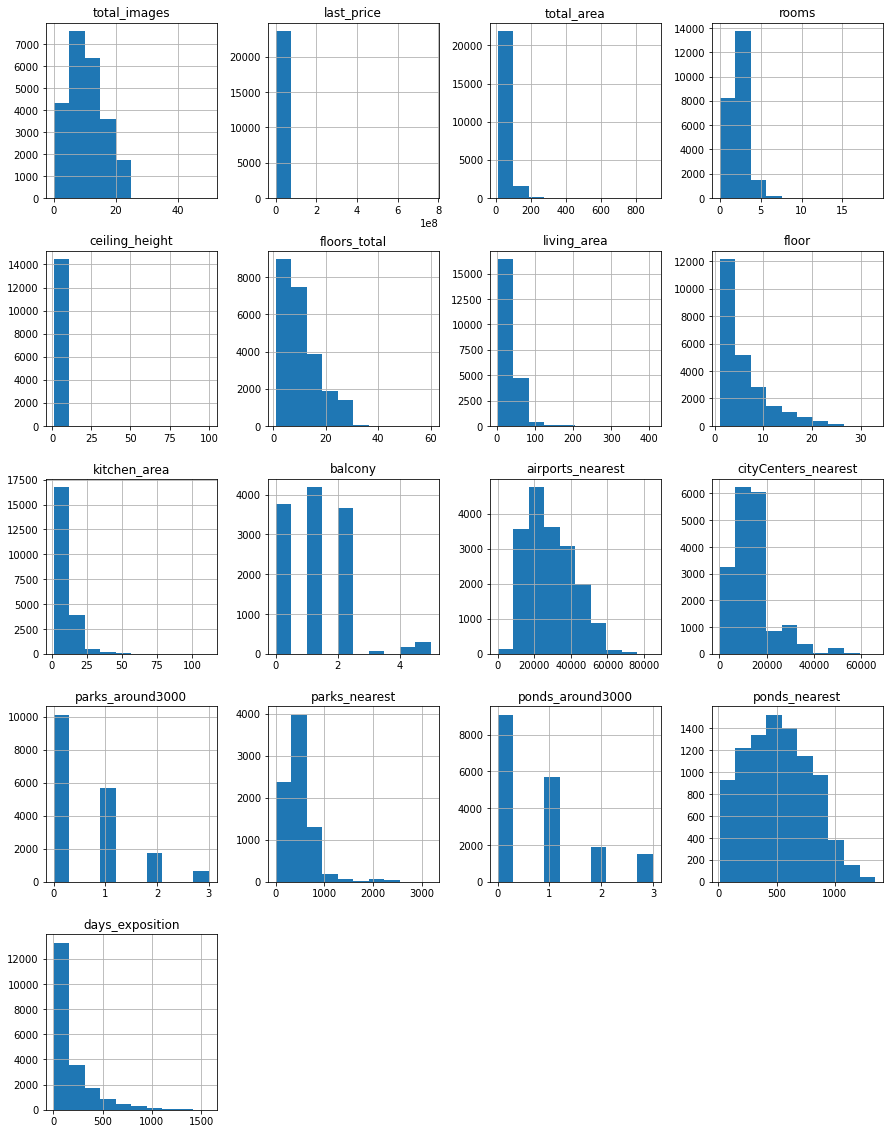

In [5]:
data.hist(figsize=(15, 20))

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В данных много пропущенных значений. Надо определить, какие столбцы нам нужны, а какие можно отбросить.

Типы переменных:

Категориальные: 

locality_name

Логические: 

is_apartment, 
studio, 
open_plan

Количественные: 

total_images, 
last_price, 
total_area, 
first_day_exposition, 
rooms, ceiling_height, 
floors_total, living_area, 
floor, 
kitchen_area, 
balcony, 
airports_nearest, 
cityCenters_nearest, 
parks_around3000, 
parks_nearest, 
ponds_nearest, 
ponds_around3000, 
days_exposition


Исследуя пропуски выявим столбцы, в которых будем восстанавливать пропуски, т.к. эти данные нам потребуются для для изученя влияния на стоимость квартиры.


floors_total 
living_area 
kitchen_area
cityCenters_nearest
locality_name
parks_nearest
ponds_nearest
airports_nearest
ceiling_height

Стобцы, воостановления значений которых невозможно:

locality_name и cityCenters_nearest, значения которых NaN, не подходят для анализа. Соотвественно их можно удалить.

days_exposition - значение проставляется после снятия снятию продажи

balcony, parks_around3000, ponds_around3000 если значение Nan, то логично предположить, что их реальное значеие - 0.


Все столбцы. в которых есть пропуски - количественные.
floors_total               86
is_apartment            20924
kitchen_area             2278
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181


### Предобработка данных

Если в столбцах balcony, parks_around3000, ponds_around3000 стоит значение Nan, то логично предположить, что их реальное значеие - 0.

Так же изменим тип данных на целые числа.

In [7]:
data['balcony'] = data['balcony'].fillna(0).astype(int)
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)

Удалим строчки с пустыми значениями floors_total и locality_name. Так записей не много, а заполнить их не представляется возможным.

floors_total приведем к типу int

In [8]:
data.dropna(subset = ['floors_total', 'locality_name'], inplace = True)
data['floors_total'] = data['floors_total'].astype(int)

В столбцах airports_nearest, cityCenters_nearest, parks_nearest и ponds_nearest пропуски заменим на не типичное значение  -1.


In [9]:
data['airports_nearest'] = data['airports_nearest'].fillna(-1)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(-1)
data['parks_nearest'] = data['parks_nearest'].fillna(-1)
data['ponds_nearest'] = data['ponds_nearest'].fillna(-1)

Избавимся от столбцов is_apartment, total_images, studio, open_plan. Они не представляют интереса для нашего исследования. 

In [10]:
data = data.drop(['is_apartment'], axis='columns')
data = data.drop(['total_images'], axis='columns')
data = data.drop(['studio'], axis='columns')
data = data.drop(['open_plan'], axis='columns')

Посмотрим уникальные значения ceiling_height

In [11]:
print(sorted(data['ceiling_height'].unique()))

[1.0, 2.0, 2.3, 2.4, 2.45, 2.46, 2.48, 2.53, 2.59, 2.62, 2.63, 2.7, nan, 1.2, 1.75, 2.2, 2.25, 2.34, 2.47, 2.49, 2.5, 2.51, 2.52, 2.54, 2.55, 2.56, 2.57, 2.58, 2.6, 2.61, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 1

Приведем значения высот в пределах от 24 до 40 метров к правильному значеню, поделив на 10. 
Удалим строки с выбивающимися значениями высот.

In [12]:
data.loc[(data['ceiling_height'] > 24) & (data['ceiling_height']<40), 'ceiling_height'] = data['ceiling_height'] / 10
data.drop(data[(data['ceiling_height'] > 4) | (data['ceiling_height']<2.2)].index, inplace=True)
print(sorted(data['ceiling_height'].unique()))

[2.2, 2.25, 2.3, 2.4, 2.45, 2.46, 2.48, 2.49, 2.52, 2.53, 2.58, 2.59, 2.62, 2.63, 2.66, 2.68, 2.69, 2.7, nan, 2.34, 2.47, 2.5, 2.51, 2.54, 2.55, 2.56, 2.57, 2.6, 2.61, 2.64, 2.65, 2.67, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0]


Что бы заполнить пропущенные значения в ceiling_height, воспользуемся схожими данными. 
Будем заполнять пропущенные значения медианой высот квартир, совпадаюих по округленной площади.
Причем, слишком маленькие/большие квартиры придется заполнить объединенны медианным значением менее 20 м2 и более 218м2, т.к. в выборке нет возможности их групировки по схожей площади(площадь уникальна для выборки, и округление не дает результата). Мы можем использовать такое приближение, т.к. количество таких выбивающихся площадей не велико.

In [13]:
list_of_nan_ceiling_height = data.loc[data['ceiling_height'].isna()]
list_of_nan_ceiling_height

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11,18.6,1,11.0,2,посёлок Шушары,12817.0,18603.0,0,-1.0,0,-1.0,81.0
2,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5,34.3,4,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14,NaN,9,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
5,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12,14.4,5,9.1,0,городской посёлок Янино-1,-1.0,-1.0,0,-1.0,0,-1.0,55.0
6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26,10.6,6,14.4,1,посёлок Парголово,52996.0,19143.0,0,-1.0,0,-1.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,3200000.0,39.0,2017-12-16T00:00:00,1,NaN,9,20.0,6,11.0,2,Санкт-Петербург,40837.0,16704.0,0,-1.0,0,-1.0,38.0
23690,5500000.0,52.0,2018-07-19T00:00:00,2,NaN,5,31.0,2,6.0,0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,-1.0,15.0
23692,1350000.0,30.0,2017-07-07T00:00:00,1,NaN,5,17.5,4,6.0,0,Тихвин,-1.0,-1.0,0,-1.0,0,-1.0,413.0
23695,3100000.0,59.0,2018-01-15T00:00:00,3,NaN,5,38.0,4,8.5,0,Тосно,-1.0,-1.0,0,-1.0,0,-1.0,45.0


In [14]:
for area in data['total_area'].unique():
    if 16<area<218 :
        data.loc[(np.round(data['total_area'],0) == np.round(area,0)) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
        data.loc[np.round(data['total_area'],0) == np.round(area,0), 'ceiling_height'].median()
    elif area>=218:
        data.loc[(np.round(data['total_area'],0) == np.round(area,0)) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
        data.loc[np.round(data['total_area'],0) > 218, 'ceiling_height'].median()
    else:
        data.loc[(np.round(data['total_area'],0) == np.round(area,0)) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
        data.loc[np.round(data['total_area'],0) < 20, 'ceiling_height'].median()
data.loc[list_of_nan_ceiling_height.index, :] 

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,3350000.0,40.4,2018-12-04T00:00:00,1,2.70,11,18.6,1,11.0,2,посёлок Шушары,12817.0,18603.0,0,-1.0,0,-1.0,81.0
2,5196000.0,56.0,2015-08-20T00:00:00,2,2.60,5,34.3,4,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14,NaN,9,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
5,2890000.0,30.4,2018-09-10T00:00:00,1,2.50,12,14.4,5,9.1,0,городской посёлок Янино-1,-1.0,-1.0,0,-1.0,0,-1.0,55.0
6,3700000.0,37.3,2017-11-02T00:00:00,1,2.60,26,10.6,6,14.4,1,посёлок Парголово,52996.0,19143.0,0,-1.0,0,-1.0,155.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23687,3200000.0,39.0,2017-12-16T00:00:00,1,2.65,9,20.0,6,11.0,2,Санкт-Петербург,40837.0,16704.0,0,-1.0,0,-1.0,38.0
23690,5500000.0,52.0,2018-07-19T00:00:00,2,2.61,5,31.0,2,6.0,0,Санкт-Петербург,20151.0,6263.0,1,300.0,0,-1.0,15.0
23692,1350000.0,30.0,2017-07-07T00:00:00,1,2.50,5,17.5,4,6.0,0,Тихвин,-1.0,-1.0,0,-1.0,0,-1.0,413.0
23695,3100000.0,59.0,2018-01-15T00:00:00,3,2.60,5,38.0,4,8.5,0,Тосно,-1.0,-1.0,0,-1.0,0,-1.0,45.0


Пропуски в living_area заполним медианными значениями, в зависимости от площади квартиры.

In [15]:
data['living_area'] = data['living_area'].fillna(data.groupby('total_area')['living_area'].transform('median'))
data.loc[data['living_area'].isna()]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
360,4990000.0,57.84,2018-08-22T00:00:00,2,2.650,27,NaN,13,10.19,2,посёлок Мурино,-1.0,-1.0,0,-1.0,0,-1.0,60.0
802,8045000.0,73.08,2018-11-10T00:00:00,2,2.700,12,NaN,12,10.69,2,Кудрово,-1.0,-1.0,0,-1.0,0,-1.0,10.0
1307,26558000.0,152.38,2017-01-11T00:00:00,5,2.750,17,NaN,12,14.61,5,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,625.0
1464,21500000.0,122.50,2017-11-07T00:00:00,3,3.000,15,NaN,8,12.00,2,Санкт-Петербург,31744.0,4836.0,0,-1.0,3,153.0,69.0
1608,2150000.0,20.10,2019-01-30T00:00:00,1,2.705,9,NaN,1,NaN,0,Санкт-Петербург,26646.0,12147.0,0,-1.0,0,-1.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22825,6100000.0,54.75,2018-07-25T00:00:00,2,2.600,19,NaN,13,12.96,0,Санкт-Петербург,35129.0,16293.0,0,-1.0,1,475.0,60.0
22923,6552700.0,83.58,2018-02-20T00:00:00,3,2.750,21,NaN,5,10.15,0,Кудрово,-1.0,-1.0,0,-1.0,0,-1.0,428.0
23018,8555000.0,64.85,2019-04-24T00:00:00,2,3.100,14,NaN,13,11.70,2,Санкт-Петербург,37434.0,8460.0,1,441.0,2,427.0,NaN
23324,9900000.0,59.09,2018-06-10T00:00:00,1,3.300,5,NaN,5,17.44,0,Санкт-Петербург,25965.0,4754.0,0,-1.0,2,776.0,178.0


Оставшиеся 132 пропуска имеют нестандартную площадь. Заменим максимально приближенными данными по общей площади.

In [17]:
#Создангие списка общей площади для отсутсвующих значений жилой площади
list_of_nan_living_area = data.loc[data['living_area'].isna()]['total_area'].unique().tolist()
list_of_nan_living_area

[57.84,
 73.08,
 152.38,
 122.5,
 20.1,
 67.77,
 42.07,
 32.84,
 64.71,
 71.97,
 65.15,
 234.0,
 304.0,
 34.12,
 201.5,
 39.41,
 63.69,
 38.62,
 148.3,
 72.34,
 56.14,
 631.0,
 45.89,
 155.2,
 35.97,
 68.11,
 31.81,
 441.98,
 34.78,
 43.04,
 53.45,
 55.06,
 50.09,
 105.34,
 34.24,
 60.96,
 160.7,
 53.77,
 500.0,
 363.1,
 63.68,
 135.1,
 41.32,
 44.85,
 69.19,
 61.62,
 90.37,
 62.66,
 157.4,
 53.36,
 263.8,
 55.94,
 33.65,
 494.1,
 62.09,
 40.24,
 34.48,
 171.96,
 295.0,
 49.44,
 30.26,
 157.3,
 364.7,
 154.1,
 35.09,
 57.35,
 52.96,
 15.0,
 41.65,
 69.53,
 241.0,
 18.5,
 103.6,
 28.49,
 67.35,
 50.78,
 55.09,
 70.81,
 56.96,
 182.84,
 41.16,
 199.2,
 71.25,
 135.7,
 35.51,
 68.66,
 21.8,
 96.8,
 75.44,
 175.7,
 151.17,
 65.26,
 55.39,
 39.45,
 114.55,
 98.61,
 197.9,
 77.87,
 123.7,
 84.08,
 43.27,
 63.64,
 371.0,
 13.2,
 33.38,
 152.8,
 57.62,
 33.02,
 238.26,
 254.0,
 32.83,
 70.01,
 31.48,
 422.2,
 35.28,
 50.62,
 38.35,
 184.3,
 17.2,
 53.81,
 31.65,
 132.65,
 147.98,
 54.75,
 83.5

In [42]:
#Создадимм сводную таблицу с медианными жилыми и общими площадями для существующих значений
df_total_living_area = data.loc[data['living_area'].notna()][['total_area','living_area']].\
drop_duplicates().sort_values('total_area').groupby('total_area').agg({'living_area':'median'}).reset_index()
df_total_living_area

,total_area,living_area
0,12.0,10.0
1,13.0,10.0
2,14.0,11.0
3,15.5,10.0
4,16.0,13.0
...,...,...
2017,517.0,332.0
2018,590.0,409.0
2019,618.0,258.0
2020,631.2,322.3


In [43]:
for area in list_of_nan_living_area:
    i = df_total_living_area[df_total_living_area['total_area']<area].index.max()
    i2 = data[data['total_area'] == area].index.tolist()
    data.loc[i2,'living_area'] = (df_total_living_area.loc[i,'living_area'] + df_total_living_area.loc[i+2,'living_area'])/2

In [44]:
#проверка. Заполнение пропусков после работы цикла.
data.query('total_area in @list_of_nan_living_area')

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
360,4990000.0,57.84,2018-08-22T00:00:00,2,2.650,27,34.1625,13,10.19,2,посёлок Мурино,-1.0,-1.0,0,-1.0,0,-1.0,60.0
802,8045000.0,73.08,2018-11-10T00:00:00,2,2.700,12,42.7000,12,10.69,2,Кудрово,-1.0,-1.0,0,-1.0,0,-1.0,10.0
1307,26558000.0,152.38,2017-01-11T00:00:00,5,2.750,17,88.5500,12,14.61,5,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,625.0
1464,21500000.0,122.50,2017-11-07T00:00:00,3,3.000,15,76.1500,8,12.00,2,Санкт-Петербург,31744.0,4836.0,0,-1.0,3,153.0,69.0
1608,2150000.0,20.10,2019-01-30T00:00:00,1,2.705,9,15.0750,1,NaN,0,Санкт-Петербург,26646.0,12147.0,0,-1.0,0,-1.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22825,6100000.0,54.75,2018-07-25T00:00:00,2,2.600,19,33.0500,13,12.96,0,Санкт-Петербург,35129.0,16293.0,0,-1.0,1,475.0,60.0
22923,6552700.0,83.58,2018-02-20T00:00:00,3,2.750,21,61.9750,5,10.15,0,Кудрово,-1.0,-1.0,0,-1.0,0,-1.0,428.0
23018,8555000.0,64.85,2019-04-24T00:00:00,2,3.100,14,36.8425,13,11.70,2,Санкт-Петербург,37434.0,8460.0,1,441.0,2,427.0,NaN
23324,9900000.0,59.09,2018-06-10T00:00:00,1,3.300,5,33.5400,5,17.44,0,Санкт-Петербург,25965.0,4754.0,0,-1.0,2,776.0,178.0


Заменим пропуски в солбце kitchen_area на медианные значения площадей кухонь в квартирах такой же площади. Площадь округлена до целых.

In [45]:
list_of_nan_kitchen_area = data.loc[data['kitchen_area'].isna()]
list_of_nan_kitchen_area

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,64900000.0,159.0,2015-07-24T00:00:00,3,3.00,14,95.0,9,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
30,2200000.0,32.8,2018-02-19T00:00:00,1,2.55,9,17.5,2,NaN,0,Коммунар,-1.0,-1.0,0,-1.0,0,-1.0,63.0
37,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5,28.5,1,NaN,0,поселок городского типа Красный Бор,-1.0,-1.0,0,-1.0,0,-1.0,196.0
44,5350000.0,40.0,2018-11-18T00:00:00,1,2.70,22,18.0,3,NaN,1,Санкт-Петербург,30471.0,11603.0,1,620.0,1,1152.0,NaN
59,6300000.0,46.5,2017-03-06T00:00:00,1,2.56,13,28.0,13,NaN,0,Санкт-Петербург,11125.0,14501.0,0,-1.0,0,-1.0,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,2414306.0,40.5,2016-09-08T00:00:00,1,2.56,18,19.6,10,NaN,0,Никольское,-1.0,-1.0,0,-1.0,0,-1.0,627.0
23663,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10,50.5,1,NaN,0,Санкт-Петербург,33642.0,13943.0,0,-1.0,2,844.0,59.0
23670,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9,27.0,2,NaN,0,поселок городского типа Синявино,-1.0,-1.0,0,-1.0,0,-1.0,45.0
23679,2500000.0,35.0,2017-12-08T00:00:00,1,2.60,9,17.0,4,NaN,0,Сосновый Бор,-1.0,-1.0,0,-1.0,0,-1.0,45.0


<AxesSubplot:xlabel='living_area', ylabel='kitchen_area'>

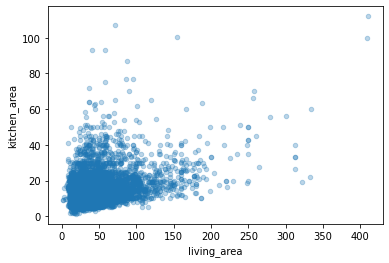

In [46]:
import warnings
warnings.simplefilter('ignore')
for area in data['living_area'].unique():
         data.loc[(np.round(data['living_area'],0) == np.round(area,0)) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
         data.loc[np.round(data['living_area'],0) == np.round(area,0), 'kitchen_area'].median()
data.plot(x='living_area', y='kitchen_area', kind='scatter', alpha=0.3)

In [47]:
data.loc[data['kitchen_area'].isna()]

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2243,130278280.0,304.0,2015-07-24T00:00:00,5,3.11,9,181.1,7,NaN,0,Санкт-Петербург,25593.0,5913.0,2,164.0,0,-1.0,599.0
7558,72000000.0,251.0,2016-02-19T00:00:00,3,2.75,4,169.0,3,NaN,0,Санкт-Петербург,24377.0,4471.0,3,570.0,0,-1.0,500.0
10684,32894076.0,364.7,2019-05-02T00:00:00,7,3.32,3,213.1,1,NaN,5,Санкт-Петербург,-1.0,-1.0,0,-1.0,0,-1.0,NaN


In [48]:
#Оставшиеся пропуски kitchen_area заменим средним значением kitchen_area для квартир более 200м2
kitchen_part_200 = data.loc[data['total_area'] > 200, 'kitchen_area'] / data.loc[data['total_area'] > 200, 'total_area']
kitchen_mean_200 = kitchen_part_200.mean()
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * kitchen_mean_200).round(1)

In [49]:
#Приведем столбец first_day_exposition к типу данных datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y%m%dT%H:%M:%S')

In [50]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [52]:
# Функция убирает из названий все слова, начинающися со строчных букв
def is_upper(x): 
    x = x.split()
    new_name = ''
    count = 0
    for i in x:        
        if i.istitle():
            if count == 0:
                new_name = i
                count+=1
            else:
                new_name += ' ' + i
        
    return new_name

In [56]:
data['locality_name'] = data['locality_name'].apply(lambda x: is_upper(x))
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23495 entries, 0 to 23698
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   last_price            23495 non-null  float64       
 1   total_area            23495 non-null  float64       
 2   first_day_exposition  23495 non-null  datetime64[ns]
 3   rooms                 23495 non-null  int64         
 4   ceiling_height        23495 non-null  float64       
 5   floors_total          23495 non-null  int64         
 6   living_area           23495 non-null  float64       
 7   floor                 23495 non-null  int64         
 8   kitchen_area          23495 non-null  float64       
 9   balcony               23495 non-null  int64         
 10  locality_name         23495 non-null  object        
 11  airports_nearest      23495 non-null  float64       
 12  cityCenters_nearest   23495 non-null  float64       
 13  parks_around3000

In [61]:
data.isna().sum()

last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3159
dtype: int64

### Посчитайте и добавьте в таблицу новые столбцы

Цена одного квадратного метра

In [62]:
data['price_square_meter'] = np.round(data['last_price'] / data['total_area']).astype(int)

День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
месяц публикации объявления;
год публикации объявления;

In [63]:
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year

Тип этажа квартиры (значения — «первый», «последний», «другой»);

In [64]:
def sort_floor(row):
    floor = row['floor']
    if floor == 1:
        return('первый')
    elif floor == row['floors_total']:
        return('последний')
    return('другой')

data['floor_type'] = data.apply(sort_floor, axis=1)

In [65]:
data['cityCenters_nearest_km'] =\
np.round(data.loc[data['cityCenters_nearest'] !=-1, 'cityCenters_nearest']/1000).astype(int)
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(-1)

In [66]:
data

,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,exposition_weekday,exposition_month,exposition_year,floor_type,cityCenters_nearest_km
0,13000000.0,108.00,2019-03-07,3,2.70,16,51.000,8,25.0,0,...,482.0,2,755.0,NaN,120370,3,3,2019,другой,16.0
1,3350000.0,40.40,2018-12-04,1,2.70,11,18.600,1,11.0,2,...,-1.0,0,-1.0,81.0,82921,1,12,2018,первый,19.0
2,5196000.0,56.00,2015-08-20,2,2.60,5,34.300,4,8.3,0,...,90.0,2,574.0,558.0,92786,3,8,2015,другой,14.0
3,64900000.0,159.00,2015-07-24,3,3.00,14,95.000,9,20.2,0,...,84.0,3,234.0,424.0,408176,4,7,2015,другой,7.0
4,10000000.0,100.00,2018-06-19,2,3.03,14,32.000,13,41.0,0,...,112.0,1,48.0,121.0,100000,1,6,2018,другой,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9700000.0,133.81,2017-03-21,3,3.70,5,73.300,3,13.8,0,...,796.0,3,381.0,NaN,72491,1,3,2017,другой,4.0
23695,3100000.0,59.00,2018-01-15,3,2.60,5,38.000,4,8.5,0,...,-1.0,0,-1.0,45.0,52542,0,1,2018,другой,-1.0
23696,2500000.0,56.70,2018-02-11,2,2.60,3,29.700,1,8.0,0,...,-1.0,0,-1.0,NaN,44092,6,2,2018,первый,-1.0
23697,11475000.0,76.75,2017-03-28,2,3.00,17,41.825,12,23.3,2,...,173.0,3,196.0,602.0,149511,1,3,2017,другой,10.0


### Проведите исследовательский анализ данных

In [85]:
def draw_hist(column, xmin, xmax):
    data[column].hist(bins=50, range=(xmin, xmax), figsize=(10,7))

In [91]:
def draw_boxplot(column, ymin= 0, ymax=150):
    plt.figure(figsize=(10,7))
    plt.ylim(ymin, ymax)
    data.boxplot(column)

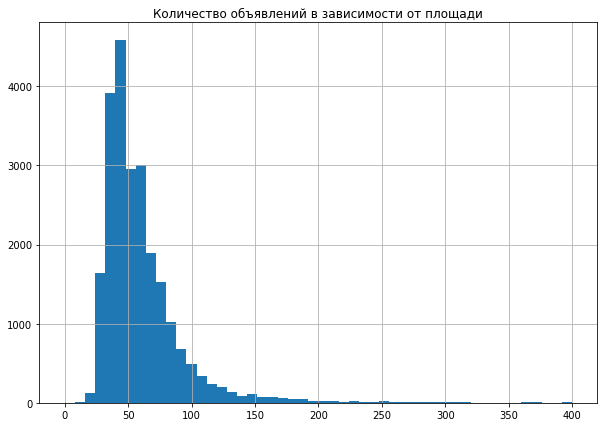

In [95]:
draw_hist('total_area', 0,400)
plt.title('Количество объявлений в зависимости от площади')
plt.show()

Гистограмма построенная по столбцу total_area похоже на распределение Фишера, квартиры менее 20 метров практически отсутсвуют, болше всего кваритир имеют площадь около 40 метров, и присутствуют единичные случаи, площадью более 160 м.

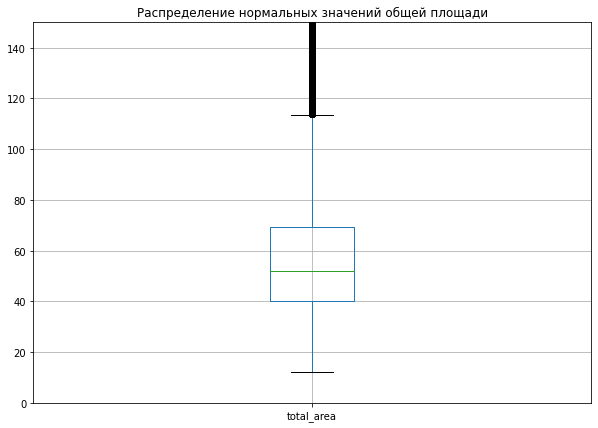

In [100]:
draw_boxplot('total_area')
plt.title('Распределение нормальных значений общей площади')
plt.show()

Распределение нормальных значений total_area находится в промежутке между 15 и 115 м2. Далее будем работать в пределах этих значений.

In [101]:
data = data.query('total_area>=15 and total_area<=115')

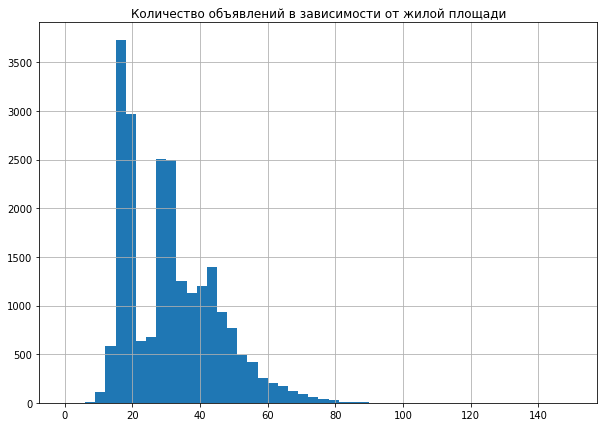

In [102]:
draw_hist('living_area', 0,150)
plt.title('Количество объявлений в зависимости от жилой площади')
plt.show()

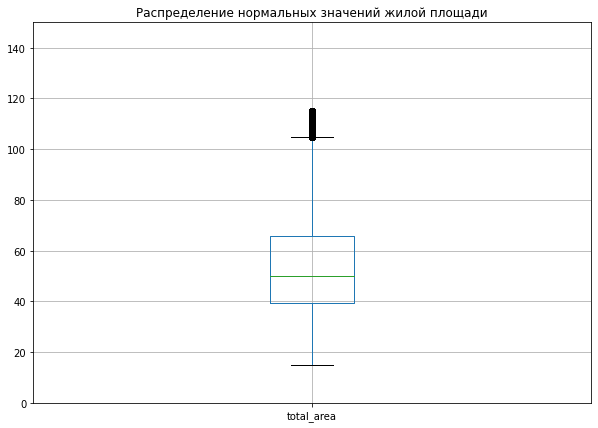

In [103]:
draw_boxplot('total_area')
plt.title('Распределение нормальных значений жилой площади')
plt.show()

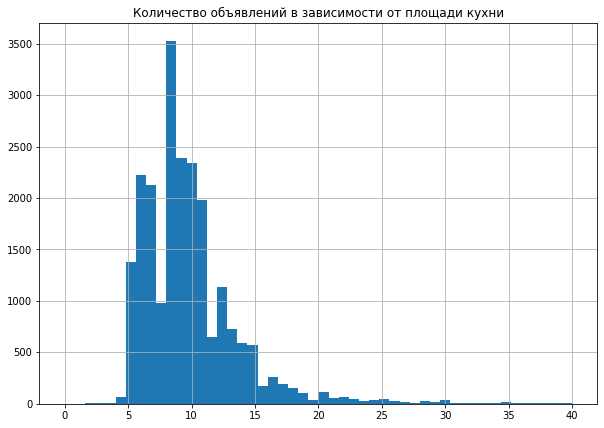

In [104]:
draw_hist('kitchen_area', 0,40)
plt.title('Количество объявлений в зависимости от площади кухни')
plt.show()

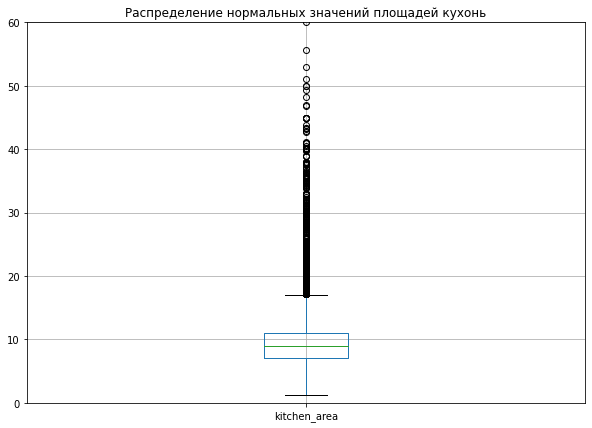

In [105]:
draw_boxplot('kitchen_area',0,60)
plt.title('Распределение нормальных значений площадей кухонь')
plt.show()

В основном, квартиры площадью от 40 до 60 м2, в которых кухня площадью от 6 до 10 метров

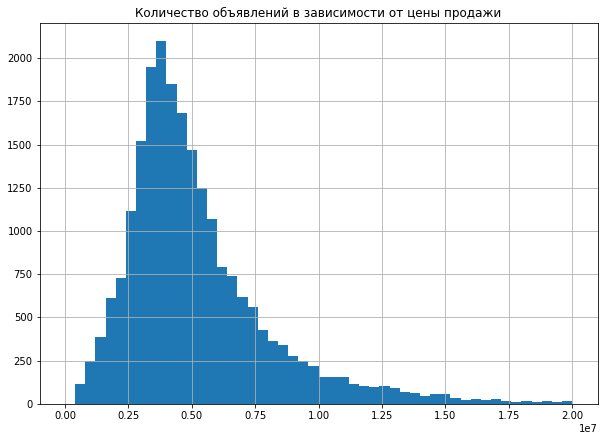

In [106]:
draw_hist('last_price', 0, 20000000)
plt.title('Количество объявлений в зависимости от цены продажи')
plt.show()

График показвает правильное распределение цен. Больше всего квартир продаются по цене 3-4 миллиона. Так же присутствуют значения  близкиек к 0, надо их проверить.

In [44]:
data.query('last_price < 200000')
#Удалим эту запись, т.к. 109 метров не может стоить 12190.0 рублей
data = data.query('last_price > 200000')

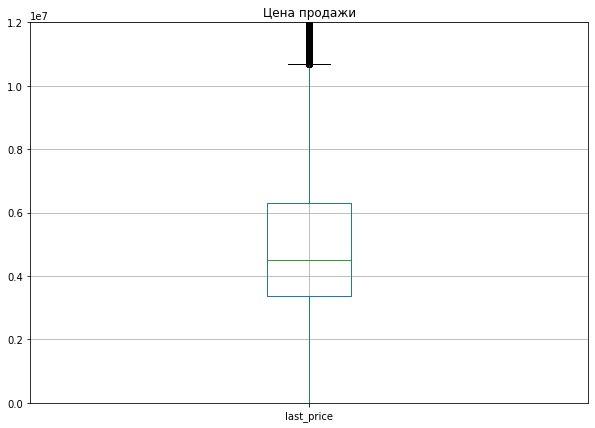

In [107]:
draw_boxplot('last_price', 0, 12000000)
plt.title('Цена продажи')
plt.show()

Выше 11 миллионов идут единичные выбросы. Будем использовать нормальные значения до 11 миллионов.

In [46]:
data = data.query('last_price<=11000000')

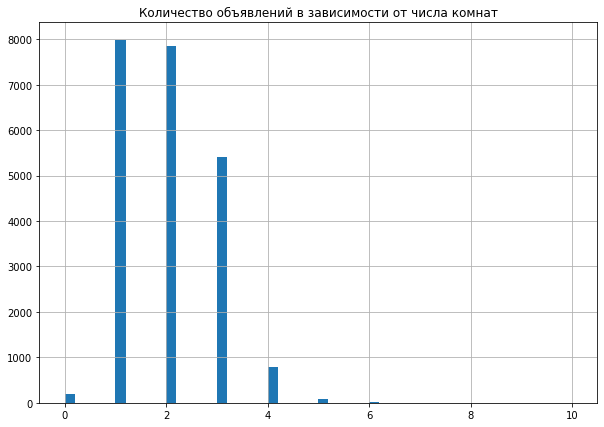

In [108]:
draw_hist('rooms', 0, 10)
plt.title('Количество объявлений в зависимости от числа комнат')
plt.show()

Первое место по продажам занимают однушки, второе двушки, третье трешки. А больше 5 комнат на графике не видно в таком масштабе. Построим ящик с усами

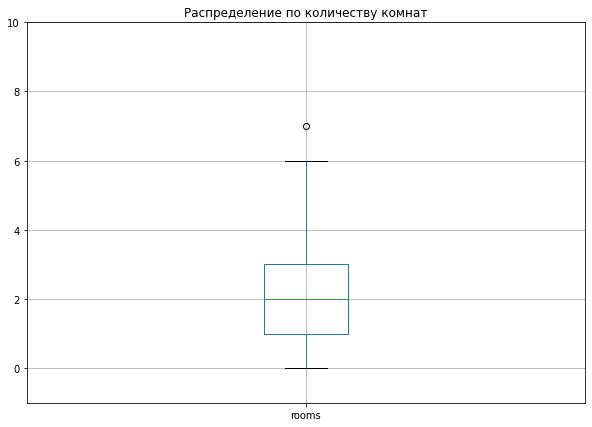

In [110]:
draw_boxplot('rooms', -1, 10)
plt.title('Распределение по количеству комнат')
plt.show()

In [49]:
#Так же отбросим все лишнее
data = data.query('rooms <7')

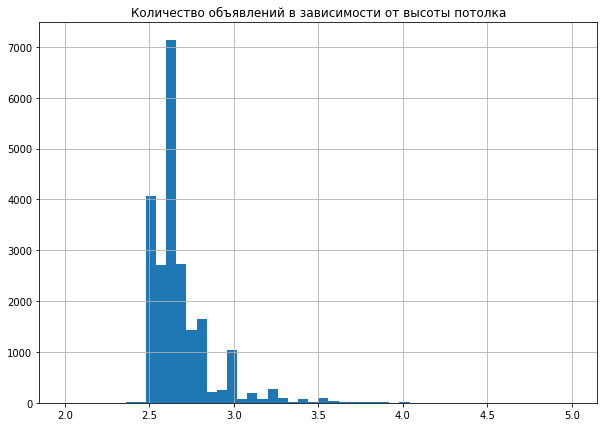

In [111]:
draw_hist('ceiling_height', 2, 5)
plt.title('Количество объявлений в зависимости от высоты потолка')
plt.show()

В основном, высота потолков от 2,5 до 3 метров. 

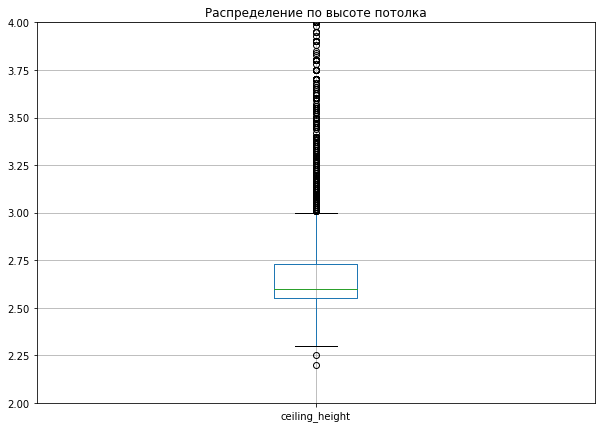

In [112]:
draw_boxplot('ceiling_height', 2, 4)
plt.title('Распределение по высоте потолка')
plt.show()

In [113]:
# Будем испошльзовать значения от 2,3 до 3 м2
data = data.query('ceiling_height>=2.3 and ceiling_height <=3')


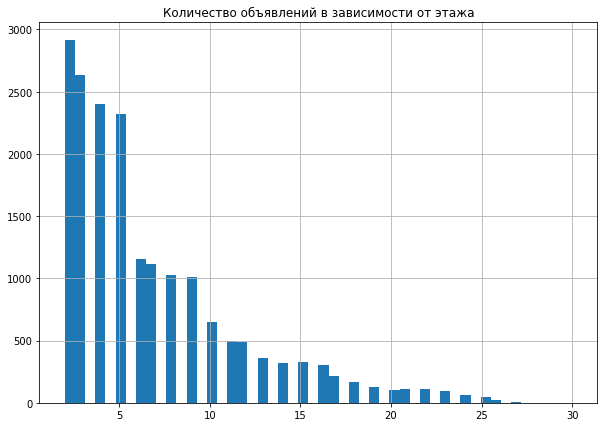

In [115]:
draw_hist('floor', 2, 30)
plt.title('Количество объявлений в зависимости от этажа')
plt.show()

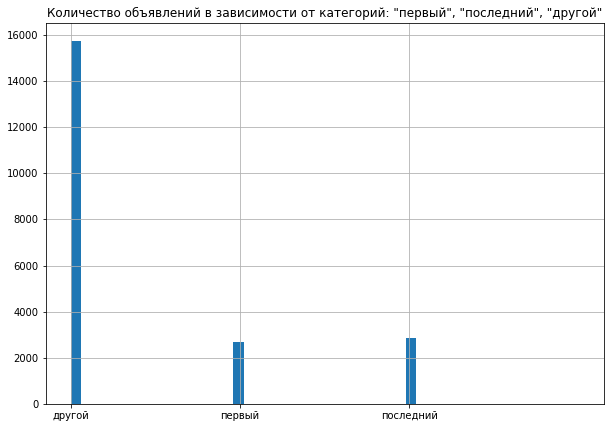

In [116]:
draw_hist('floor_type',0,3)
plt.title('Количество объявлений в зависимости от категорий: "первый", "последний", "другой"')
plt.show()

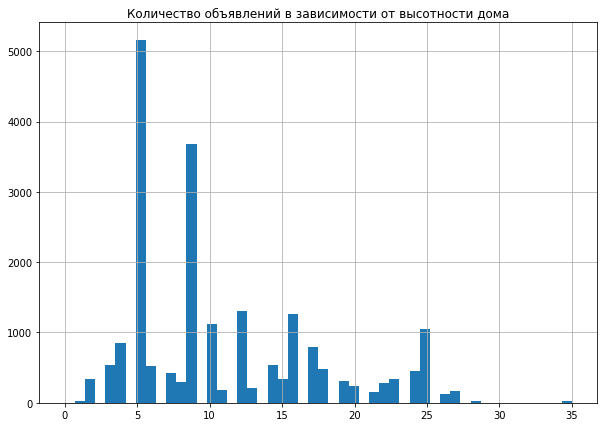

In [117]:
draw_hist('floors_total',0,35)
plt.title('Количество объявлений в зависимости от высотности дома')
plt.show()

В основном продаются этажи с 1 по 5. Пятиэтажек и девятиэтажек больше всего.

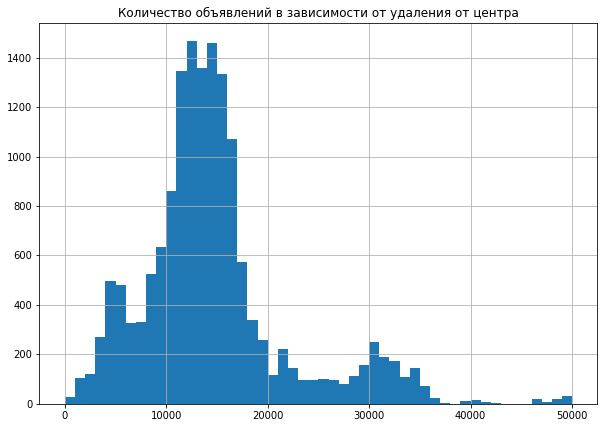

In [118]:
draw_hist('cityCenters_nearest',0,50000)
plt.title('Количество объявлений в зависимости от удаления от центра')
plt.show()

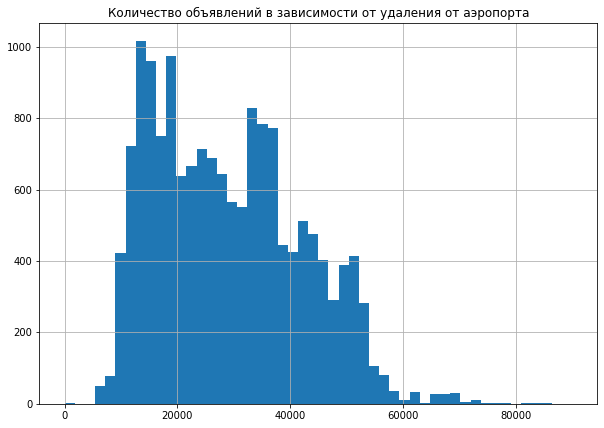

In [119]:
draw_hist('airports_nearest',0,90000)
plt.title('Количество объявлений в зависимости от удаления от аэропорта')
plt.show()

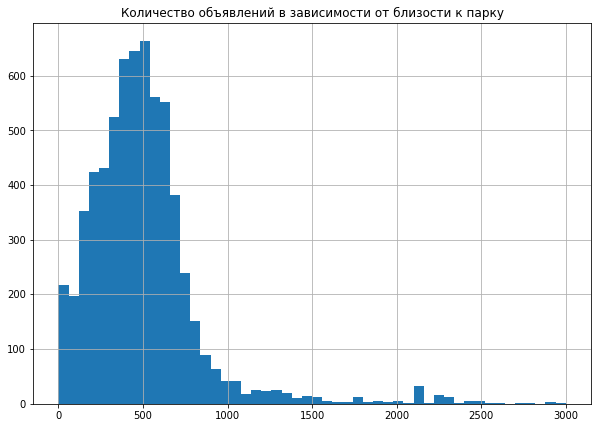

In [121]:
draw_hist('parks_nearest',0,3000)
plt.title('Количество объявлений в зависимости от близости к парку')
plt.show()

Гистограмма длительности продажи квартир

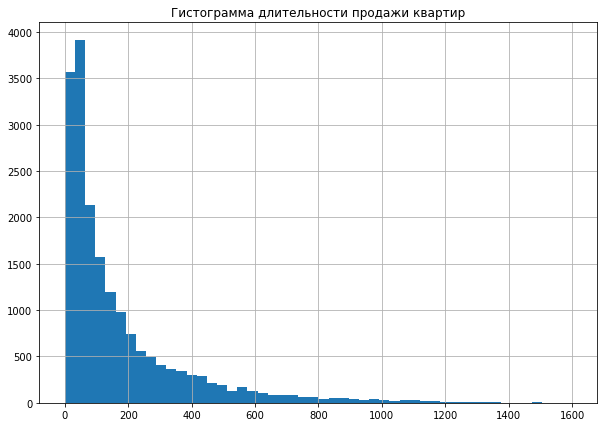

In [122]:
draw_hist('days_exposition', 0, 1600)
plt.title('Гистограмма длительности продажи квартир')
plt.show()

Бывало, что квартиры продавались в день размещения, а бывало что висели 4 года. В основном квартиры продавались за 2 года

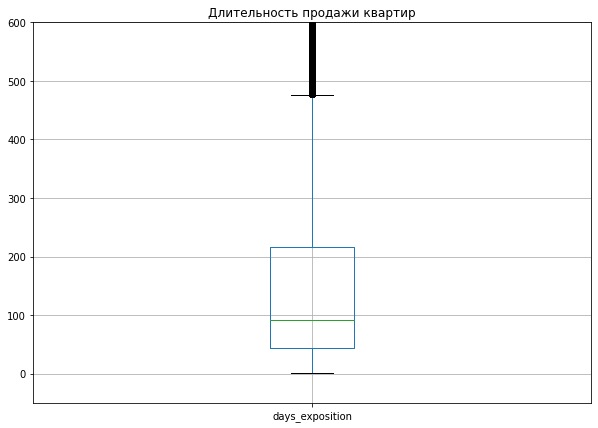

In [123]:
draw_boxplot('days_exposition', -50, 600)
plt.title('Длительность продажи квартир')
plt.show()

В основном, значения лежат в пределах от 40 до 210 дней. Такова средняя длительность продажи квартиры. 

Заметные на гистограмме нюансы распределения хорошо бы зафиксировать в числах: иметь под рукой среднее, медиану, количество наблюдений в выборке и разброс их значений.

In [124]:
data['days_exposition'].describe()

count    18624.000000
mean       172.082635
std        210.538145
min          1.000000
25%         44.000000
50%         91.000000
75%        217.000000
max       1580.000000
Name: days_exposition, dtype: float64

Можно считать быстрой продажей, если квартира продавалась в срок до 43 дней. Средняя длительность продажи квартир от 43 до 214 дней. А если квартира продавалась от 214 до 470 дней, то квартира продавалась долго. Как видно из графиков, далее идут сверхвысокие значения, выбросы, которые сильно влияют на среднее значение. Оставим нормальные значения в пределах от 0 до 470 дней.

In [125]:
data = data.query('days_exposition>0 and days_exposition<=470')

Далее изучим какие факторы больше всего влияют на общую (полную) стоимость объекта.

Изучим, зависит ли цена от:

* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).

In [126]:
def draw_plot(data, y, x):
    data.plot(y=y, x=x, kind='scatter', alpha=0.1)

In [127]:
price_area_rooms_corr = data.pivot_table(index=data.index, values=['total_area', 'living_area', 'rooms', 'price_square_meter'], aggfunc='mean')
price_area_rooms_corr.corr()

,living_area,price_square_meter,rooms,total_area
living_area,1.000000,-0.036926,0.880454,0.908291
price_square_meter,-0.036926,1.000000,-0.147030,0.065021
rooms,0.880454,-0.147030,1.000000,0.793779
total_area,0.908291,0.065021,0.793779,1.000000


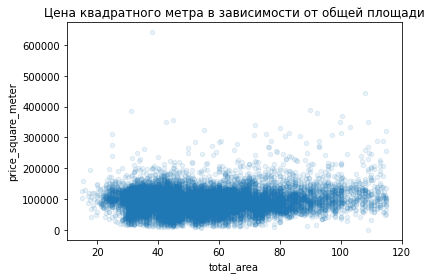

In [128]:
draw_plot(price_area_rooms_corr, 'price_square_meter', 'total_area')
plt.title('Цена квадратного метра в зависимости от общей площади')
plt.show()

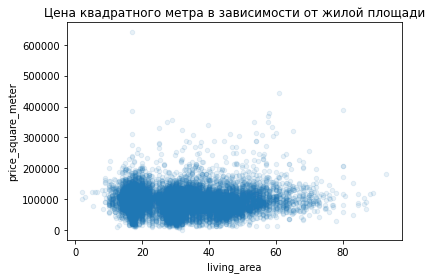

In [129]:
draw_plot(price_area_rooms_corr, 'price_square_meter', 'living_area')
plt.title('Цена квадратного метра в зависимости от жилой площади')
plt.show()

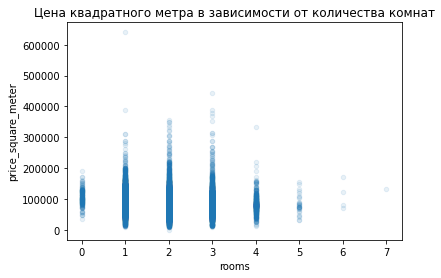

In [130]:
draw_plot(price_area_rooms_corr, 'price_square_meter', 'rooms')
plt.title('Цена квадратного метра в зависимости от количества комнат')
plt.show()

Все три графика говорят нам о том, что с увеличением комнат, общей и жилой площади, цена за метр квадратный снижается. Слабая отрицательная корреляция.

In [133]:
price_floor_type = data.pivot_table(index='floor_type', values='price_square_meter')
price_floor_type

,price_square_meter
floor_type,
другой,97500.392174
первый,78299.323054
последний,84818.923599


Усреднив цены для каждой интересующей нас группы этажности, делаем вывод, что дешевле всего продавались квартиры на первом этаже. На последнем - дороже, чем на первом, но дешевле остальных.

Рассмотрим как влияет цена в зависимости от даты размещения (день недели, месяц, год).

In [134]:
exposition_day_weak_month_year = data.pivot_table(index=data.index,\
values=['exposition_weekday', 'exposition_month', 'exposition_year', 'price_square_meter'], aggfunc='mean')
exposition_day_weak_month_year.corr()

,exposition_month,exposition_weekday,exposition_year,price_square_meter
exposition_month,1.000000,0.014291,-0.235187,0.001040
exposition_weekday,0.014291,1.000000,-0.001218,-0.001918
exposition_year,-0.235187,-0.001218,1.000000,0.062252
price_square_meter,0.001040,-0.001918,0.062252,1.000000


array([[<AxesSubplot:xlabel='exposition_month', ylabel='exposition_month'>,
        <AxesSubplot:xlabel='exposition_weekday', ylabel='exposition_month'>,
        <AxesSubplot:xlabel='exposition_year', ylabel='exposition_month'>,
        <AxesSubplot:xlabel='price_square_meter', ylabel='exposition_month'>],
       [<AxesSubplot:xlabel='exposition_month', ylabel='exposition_weekday'>,
        <AxesSubplot:xlabel='exposition_weekday', ylabel='exposition_weekday'>,
        <AxesSubplot:xlabel='exposition_year', ylabel='exposition_weekday'>,
        <AxesSubplot:xlabel='price_square_meter', ylabel='exposition_weekday'>],
       [<AxesSubplot:xlabel='exposition_month', ylabel='exposition_year'>,
        <AxesSubplot:xlabel='exposition_weekday', ylabel='exposition_year'>,
        <AxesSubplot:xlabel='exposition_year', ylabel='exposition_year'>,
        <AxesSubplot:xlabel='price_square_meter', ylabel='exposition_year'>],
       [<AxesSubplot:xlabel='exposition_month', ylabel='price_square_met

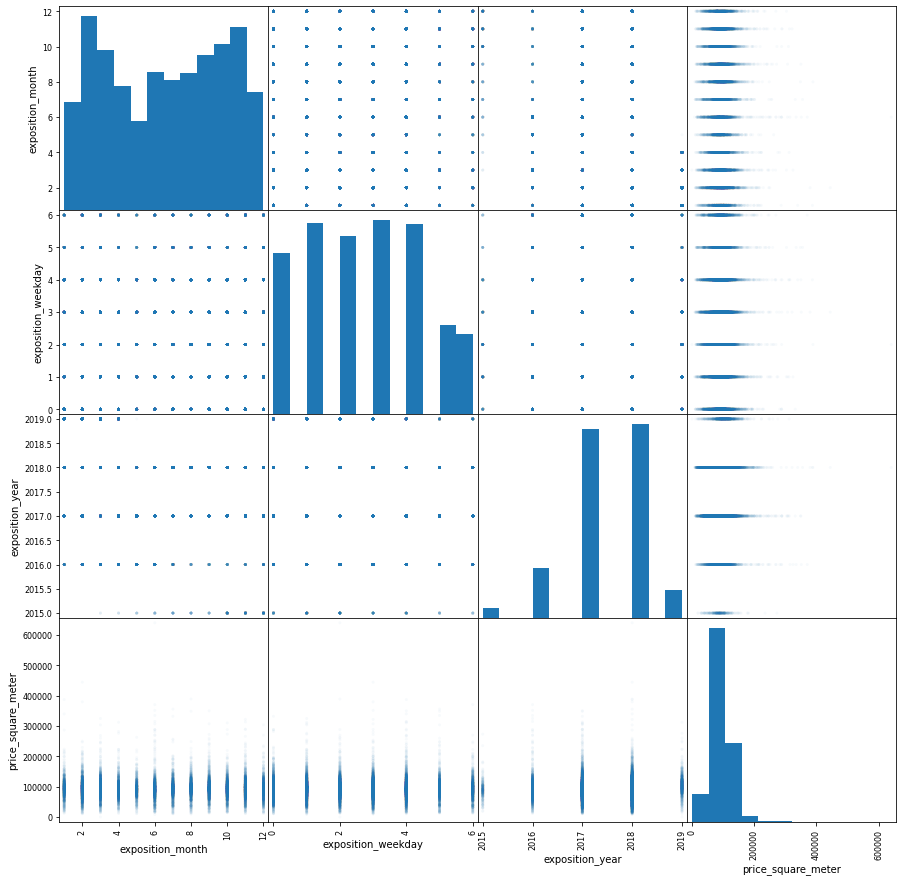

In [137]:
pd.plotting.scatter_matrix(exposition_day_weak_month_year, figsize=(15, 15),hist_kwds={'bins':12}, alpha=0.03)

С помощью метода heatmap из библиотеки seaborn визуалицируем корреляцию.

<AxesSubplot:>

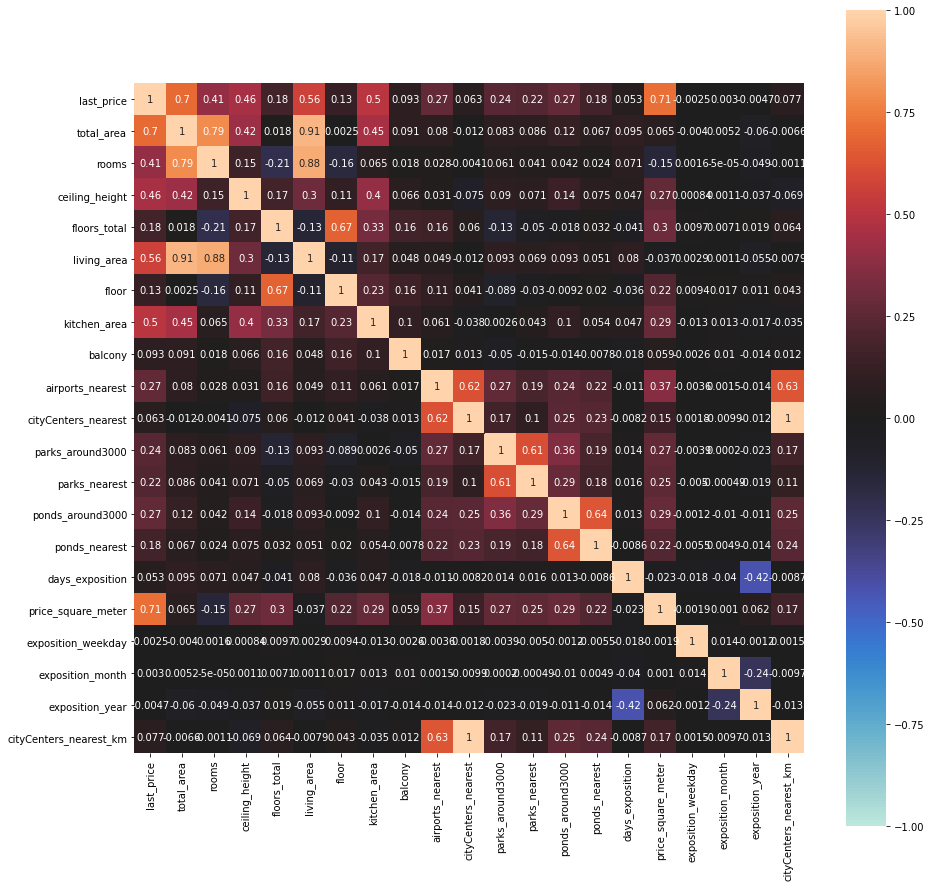

In [140]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, square=True, vmin=-1, vmax=1, center=0, ax=ax)

В зависимости от месяца: в мае устанавливали самую низкую цену, а в феврале и ноябре самую высокую.
    
В зависимости от дня: в выходные устанавливали самую низкую цену, а в будни цену ставили выше.
    
В зависимости от года: наиболее высокие цену на квартиры устанавливали в 2017 и 2018 годах.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

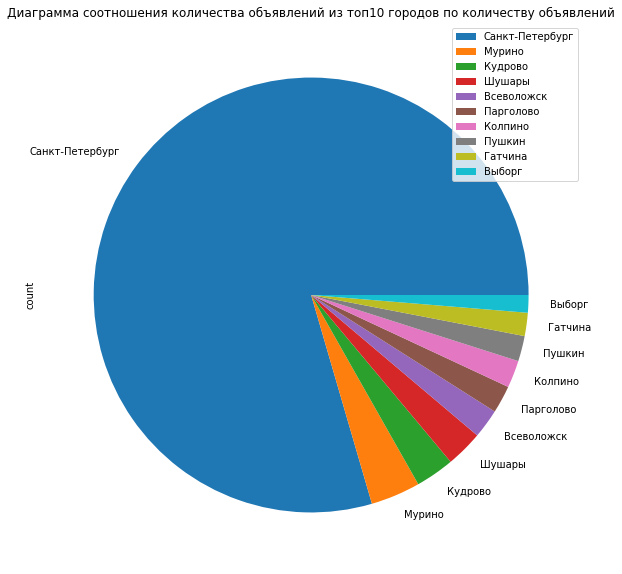

In [142]:
local_price = data.loc[:,['locality_name', 'price_square_meter']]
local_price = local_price.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['count', 'mean'])
local_price.columns = ['count', 'mean_price_square_meter']
locality_big10 = local_price.sort_values(by='count', ascending=False).head(10)
locality_big10.plot(y='count', kind='pie', figsize=(10, 10))
plt.title('Диаграмма соотношения количества объявлений из топ10 городов по количеству объявлений')
plt.show()

In [72]:
#Посмотрим на общее число продаж по годам
exposition_day_weak_month_year.groupby('exposition_year').count()

,exposition_month,exposition_weekday,price_square_meter
exposition_year,,,
2015,347,347,347
2016,1719,1719,1719
2017,6586,6586,6586
2018,6765,6765,6765
2019,984,984,984


In [73]:
locality_big10.sort_values('mean_price_square_meter', ascending = False).agg({'mean_price_square_meter':'round'})

,mean_price_square_meter
locality_name,
Санкт-Петербург,103783.0
Пушкин,98982.0
Кудрово,94484.0
Парголово,89163.0
Мурино,85941.0
Шушары,77787.0
Колпино,74701.0
Гатчина,68212.0
Всеволожск,66831.0


Самые дорогие квартиры в Санкт-Петербурге, Нушкин
и Кудрово. А самые дешевые в Выборге, Всеволожске и Гатчине.

Теперь выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра.

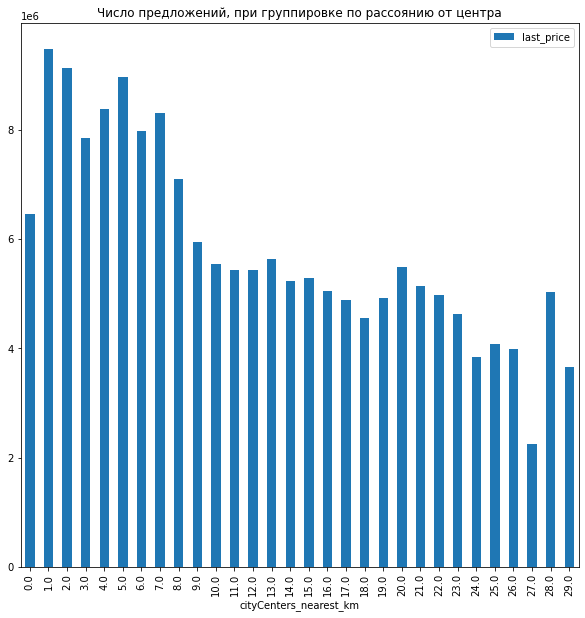

In [143]:
spb_realty = data.loc[:, ['locality_name', 'cityCenters_nearest_km','last_price']]
spb_realty = data.query('locality_name == "Санкт-Петербург"')
spb_realty = spb_realty.query('cityCenters_nearest_km != -1')
spb_realty_pivot = spb_realty.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=('mean'))
spb_realty_pivot.plot(y='last_price', kind='bar', figsize=(10, 10))   
plt.title('Число предложений, при группировке по рассоянию от центра')
plt.show()

In [145]:
#Посмотрим на число предложений, при группировке по рассоянию от центра
spb_realty_count = spb_realty.groupby('cityCenters_nearest_km').count()
spb_realty_count['last_price']

cityCenters_nearest_km
0.0        3
1.0       53
2.0       95
3.0      122
4.0      280
5.0      391
6.0      323
7.0      243
8.0      367
9.0      422
10.0     553
11.0     881
12.0    1283
13.0    1170
14.0    1010
15.0    1246
16.0    1025
17.0     677
18.0     198
19.0     132
20.0      36
21.0      78
22.0     154
23.0      60
24.0      25
25.0      25
26.0      39
27.0       1
28.0       7
29.0       2
Name: last_price, dtype: int64

наблюдаем единичные значения на 0,27,28,29 километрах. Этих вхождений слишком мало для статистики.

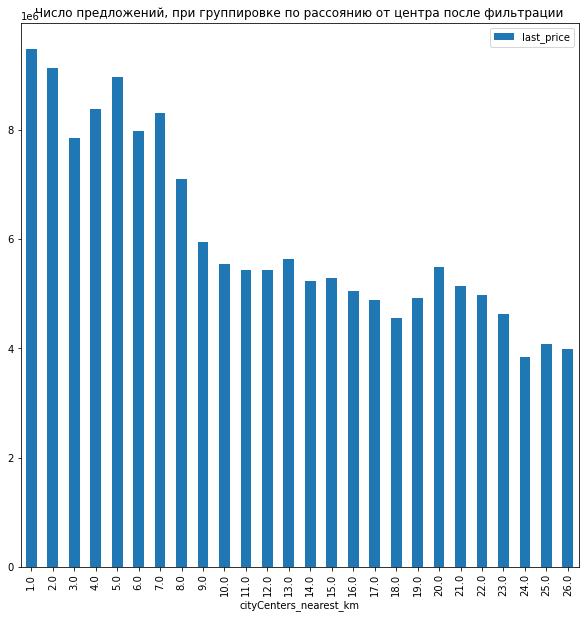

In [146]:
spb_realty_pivot = spb_realty_pivot.query('index != 0')
spb_realty_pivot = spb_realty_pivot.query('index != 27')
spb_realty_pivot = spb_realty_pivot.query('index != 28')
spb_realty_pivot = spb_realty_pivot.query('index != 29')
spb_realty_pivot.plot(y='last_price', kind='bar', figsize=(10, 10))
plt.title('Число предложений, при группировке по рассоянию от центра после фильтрации')
plt.show()

В общем, при удалении от центра, цена на квартиры падает. На графике мы видим резкие всплески и провалы цен. Возможно, это вызвано сосбенностями местности при удалении от центра. Например, удачное расположение, благополучные или неблагополучные районы, транспортная доступность и т.д

### Общий вывод

Анализируя данные, мы приходим к следующим выводам:

1. Самые дорогие квартиры расположены в Санкт-Петербурге, затем по дороговизне следуют Пушкин и Кудрово. Из топ 10 городов с наибольшим количеством объявлений о продажах, самые доступные квартиры находятся в Выборге. Более 75% всех объявлений о продаже касается квартир в Санкт-Петербурге.

2. По мере удаления от центра города, цены на квартиры падают. Однако на графике наблюдаются резкие всплески и провалы цен, что может быть связано с особенностями местности при удалении от центра, такими как благополучные или неблагополучные районы, транспортная доступность и другие факторы.

3. С увеличением количества комнат, общей и жилой площади, цена за квадратный метр снижается. Квартиры на первом этаже продаются по более низкой цене, в то время как квартиры на последнем этаже дороже, но все равно дешевле, чем остальные этажи.

4. В основном, продажи концентрируются на этажах с 1 по 5. Больше всего предложений квартир в пятиэтажках и девятиэтажках. Популярный сегмент квартир - площадью от 40 до 60 квадратных метров, с кухней площадью от 6 до 10 квадратных метров. Первое место по количеству продаж занимают однокомнатные квартиры, затем двухкомнатные и трехкомнатные.

5. Большая часть квартир продается по цене от 3 до 4 миллионов.

6. Мы также изучили время продажи квартир. Быстрыми продажами считаются те, которые осуществлялись в течение 43 дней. Однако есть и случаи, когда квартиры продавались в день размещения объявления. Также замечены случаи длительных продаж, самая долгая из которых заняла 1850 дней. Средняя продолжительность продажи квартир составляет от 43 до 214 дней. Если же квартира была продана в промежутке от 214 до 470 дней, можно считать ее продажей с длительным сроком.

7. Мы также проанализировали зависимость от даты размещения объявления. Объявления, размещенные в мае, имеют самую низкую цену, в то время как в феврале и ноябре цены устанавливаются наиболее высокими. При размещении объявления в выходные дни цены ставятся на более низком уровне, а в будни - выше. В зависимости от года, наиболее высокие цены на квартиры были зафиксированы в 2017 и 2018 годах. Однако стоит отметить, что данные о продажах в 2015 году являются ограниченными, всего 350 записей, что в 20 раз меньше, чем в 2017 и 2018 годах.